In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

In [2]:
# Collect and parse first page
## TOP ##
responseT = requests.get('https://play.google.com/store/apps/top')

#print(responseT.status_code)

soupT = BeautifulSoup(responseT.text, 'html.parser')

########################################################
top  =pd.DataFrame( columns=["name", "category" , "# of rates","stars", "#ofdownloads","price", "company name"])
#####

In [3]:
 ##print(soupT.prettify())## the homepage 

In [4]:
##################### TOP  ################################
anchorT = soupT.find_all('div', attrs = {'class': 'W9yFB'})
big = [] 
URLT = [] 
for tt in anchorT :  
    for item in tt:
        big.append('https://play.google.com' + item.get('href'))
for g in big : 
    responseG = requests.get(g)
    #print(responseT.status_code)
    soupG = BeautifulSoup(responseG.text, 'html.parser')
    a = soupG.find_all('a', attrs = {'class': 'poRVub'})
    for s in a : 
        URLT.append('https://play.google.com' + s.get('href'))
        #print('https://play.google.com' + s.get('href'))
    

In [5]:
                          #################### TOP  #################
for urlt in URLT : 
    resp = requests.get(urlt)
    ##print(resp.status_code) 
    soup1 = BeautifulSoup(resp.text, 'html.parser')
    title = soup1.find('h1', attrs = {'class': 'AHFaub'})
    title = title.find('span')
    title = title.text
    catg = soup1.find_all('a', attrs = {'class': 'hrTbp R8zArc'})[1]
    catg = catg.text
    comp = soup1.find_all('a', attrs = {'class': 'hrTbp R8zArc'})[0]
    comp = comp.text
    price = soup1.find('button', attrs = {'class': 'LkLjZd ScJHi HPiPcc IfEcue'})
    price = price.text
    if(price == "Install"):
        price = "free"
        downl = soup1.find_all('div', attrs = {'class': 'hAyfc'})[2]
        downl = downl.find('span', attrs = {'class': 'htlgb'}).text
    else :
        price = re.findall(r"[-+]?\d*\.\d+|\d+", price)
        price = "$"+price[0]
        downl = soup1.find_all('div', attrs = {'class': 'hAyfc'})[3]
        downl = downl.find('span', attrs = {'class': 'htlgb'}).text
        
    star = soup1.find('div', attrs = {'class': 'BHMmbe'})
    star = star.text
    numrate = soup1.find('span', attrs = {'class': 'AYi5wd TBRnV'})
    numrate = numrate.text
    

    top = top.append({"name":title, "category":catg , "# of rates":numrate,"stars":star, "#ofdownloads":downl,"price":price, "company name":comp},ignore_index=True )


In [6]:
top

,name,category,# of rates,stars,#ofdownloads,price,company name
0,ZOOM Cloud Meetings,Business,"92,396",4.0,"50,000,000+",free,zoom.us
1,News Break: Local & Breaking,News & Magazines,"121,589",4.3,"10,000,000+",free,Particle Media Inc.
2,TikTok - Make Your Day,Social,"17,793,933",4.6,"500,000,000+",free,TikTok Inc.
3,SmartNews: Local Breaking News,News & Magazines,"382,050",4.3,"10,000,000+",free,"SmartNews, Inc."
4,Google Classroom,Education,"129,245",3.9,"10,000,000+",free,Google LLC
...,...,...,...,...,...,...,...
295,Solitaire TriPeaks: Play Free Solitaire Card G...,Card,"562,372",4.5,"10,000,000+",free,"GSN Games, Inc."
296,Slots: Heart of Vegas™ – Free Slot Casino Games,Casino,"348,848",4.4,"10,000,000+",free,Product Madness
297,AFK Arena,Role Playing,"2,066,908",4.6,"10,000,000+",free,Lilith Games
298,Epic Seven,Role Playing,"226,792",4.2,"1,000,000+",free,Smilegate Megaport


In [7]:
dff=top.values.tolist()
t=[]
tt=[]
for ii in dff:
    name=ii[0]
    if name in t:
        continue
    tt.append(ii)
    t.append(name)
df = pd.DataFrame(tt , columns =["name", "category" , "# of rates","stars", "#ofdownloads","price", "company name"])
top=df
top

,name,category,# of rates,stars,#ofdownloads,price,company name
0,ZOOM Cloud Meetings,Business,"92,396",4.0,"50,000,000+",free,zoom.us
1,News Break: Local & Breaking,News & Magazines,"121,589",4.3,"10,000,000+",free,Particle Media Inc.
2,TikTok - Make Your Day,Social,"17,793,933",4.6,"500,000,000+",free,TikTok Inc.
3,SmartNews: Local Breaking News,News & Magazines,"382,050",4.3,"10,000,000+",free,"SmartNews, Inc."
4,Google Classroom,Education,"129,245",3.9,"10,000,000+",free,Google LLC
...,...,...,...,...,...,...,...
284,Solitaire TriPeaks: Play Free Solitaire Card G...,Card,"562,372",4.5,"10,000,000+",free,"GSN Games, Inc."
285,Slots: Heart of Vegas™ – Free Slot Casino Games,Casino,"348,848",4.4,"10,000,000+",free,Product Madness
286,AFK Arena,Role Playing,"2,066,908",4.6,"10,000,000+",free,Lilith Games
287,Epic Seven,Role Playing,"226,792",4.2,"1,000,000+",free,Smilegate Megaport


In [8]:
top['#ofdownloads'] = top['#ofdownloads'].str.replace('+', '').astype(str)
top['#ofdownloads'] = top['#ofdownloads'].str.replace(',', '').astype(str)
top['#ofdownloads'] = top['#ofdownloads'].str.replace('.', '').astype(str)


top['price'] = top['price'].str.replace('free', '0').astype(str)
top['price'] = top['price'].str.replace('$', '').astype(str)
top['# of rates'] = top['# of rates'].str.replace(',', '').astype(str)



In [9]:
top['# of rates'] = pd.to_numeric(top['# of rates'])
top['stars'] = pd.to_numeric(top['stars'])
top['price'] = pd.to_numeric(top['price'])


top['#ofdownloads'] = pd.to_numeric(top['#ofdownloads'])

In [10]:
top.to_csv('my.csv' , index= False )

In [3]:
ds = pd.read_csv('my.csv')
top = pd.DataFrame(ds)
top

,name,category,# of rates,stars,#ofdownloads,price,company name
0,ZOOM Cloud Meetings,Business,92396,4.0,50000000,0.0,zoom.us
1,News Break: Local & Breaking,News & Magazines,121589,4.3,10000000,0.0,Particle Media Inc.
2,TikTok - Make Your Day,Social,17793933,4.6,500000000,0.0,TikTok Inc.
3,SmartNews: Local Breaking News,News & Magazines,382050,4.3,10000000,0.0,"SmartNews, Inc."
4,Google Classroom,Education,129245,3.9,10000000,0.0,Google LLC
...,...,...,...,...,...,...,...
284,Solitaire TriPeaks: Play Free Solitaire Card G...,Card,562372,4.5,10000000,0.0,"GSN Games, Inc."
285,Slots: Heart of Vegas™ – Free Slot Casino Games,Casino,348848,4.4,10000000,0.0,Product Madness
286,AFK Arena,Role Playing,2066908,4.6,10000000,0.0,Lilith Games
287,Epic Seven,Role Playing,226792,4.2,1000000,0.0,Smilegate Megaport


In [4]:
def de(txt):
    txt= re.sub("\!@#$%^&*(),.?:{}|<>", "", txt)
    txt=re.sub("\|.*$", "", txt) 
    return txt

top['name'] = top.apply(lambda row : de(row['name']) , axis = 1) 

In [5]:
top.describe()  

,# of rates,stars,#ofdownloads,price
count,2.890000e+02,289.000000,2.890000e+02,289.000000
mean,3.100917e+06,4.222145,1.109040e+08,1.580000
std,1.216987e+07,0.417076,5.329945e+08,2.884506
min,3.600000e+01,2.700000,1.000000e+03,0.000000
25%,1.727500e+04,4.000000,5.000000e+05,0.000000
50%,1.215890e+05,4.300000,1.000000e+07,0.000000
75%,9.204210e+05,4.500000,1.000000e+07,2.990000
max,1.077697e+08,4.900000,5.000000e+09,21.990000


In [6]:
top.describe(include=['O'])

,name,category,company name
count,289,289,289
unique,289,39,231
top,True Skate,Entertainment,Toca Boca
freq,1,23,7


In [7]:
top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 7 columns):
name            289 non-null object
category        289 non-null object
# of rates      289 non-null int64
stars           289 non-null float64
#ofdownloads    289 non-null int64
price           289 non-null float64
company name    289 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 15.9+ KB


# Q1 : • Do all the common applications in top chart have a rating higher than 4 stars?

In [18]:
top[top['stars'] > 4]

,name,category,# of rates,stars,#ofdownloads,price,company name
1,News Break: Local & Breaking,News & Magazines,121589,4.3,10000000,0.0,Particle Media Inc.
2,TikTok - Make Your Day,Social,17793933,4.6,500000000,0.0,TikTok Inc.
3,SmartNews: Local Breaking News,News & Magazines,382050,4.3,10000000,0.0,"SmartNews, Inc."
6,Microsoft Teams,Business,289255,4.2,10000000,0.0,Microsoft Corporation
7,Instagram,Social,96388145,4.5,1000000000,0.0,Instagram
...,...,...,...,...,...,...,...
284,Solitaire TriPeaks: Play Free Solitaire Card G...,Card,562372,4.5,10000000,0.0,"GSN Games, Inc."
285,Slots: Heart of Vegas™ – Free Slot Casino Games,Casino,348848,4.4,10000000,0.0,Product Madness
286,AFK Arena,Role Playing,2066908,4.6,10000000,0.0,Lilith Games
287,Epic Seven,Role Playing,226792,4.2,1000000,0.0,Smilegate Megaport


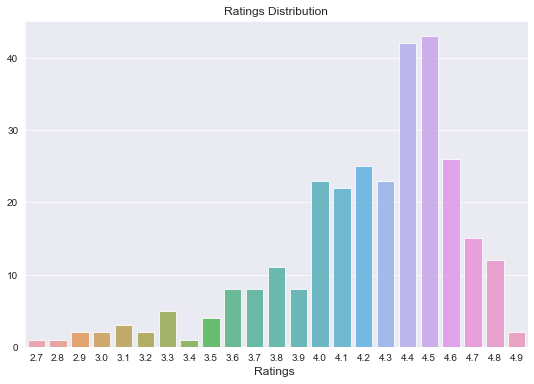

In [19]:
x = top['stars'].value_counts().index
y = top['stars'].value_counts().values

plt.figure(figsize=(9,6))
ax= sns.barplot(x, y,data= top ,alpha=0.8 )
plt.title("Ratings Distribution")
plt.xlabel('Ratings ', fontsize=12);

#alternative if needed 
#plt.figure(figsize=(6,5))
#ax = sns.countplot(topChart['stars'])
#plt.title('Distribution of stars');

# Q2 : 

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


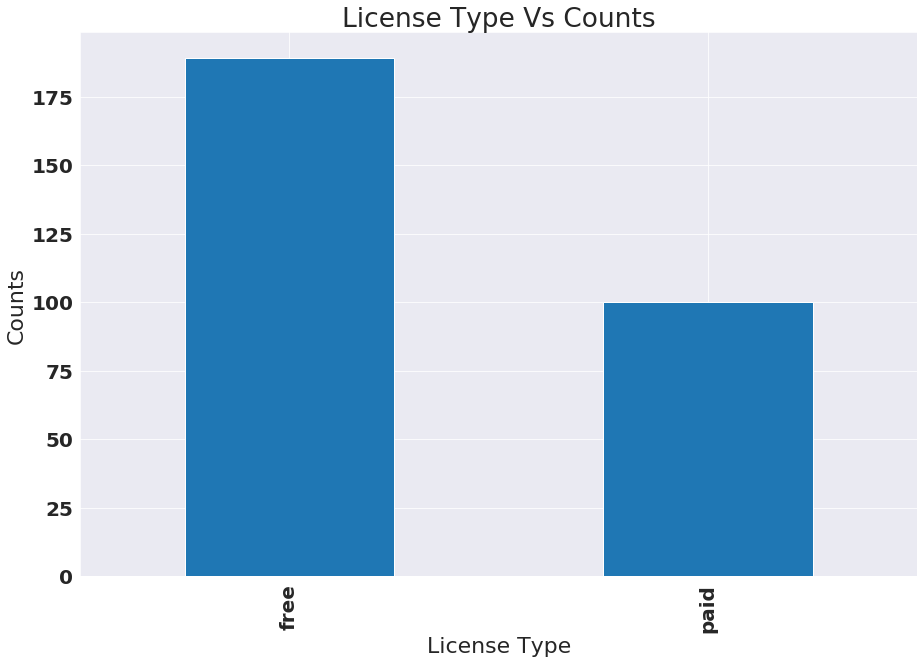

In [50]:
import matplotlib     
dff=top.values.tolist()
free=[]

for nn in dff:
    if(nn[5]==0.0):
        free.append([nn[0],nn[1],nn[2],nn[3],nn[4],nn[5],nn[6],'free'])
    else:
        free.append([nn[0],nn[1],nn[2],nn[3],nn[4],nn[5],nn[6],'paid'])
#topC = top.groupby(top['company name'][:30])['# of downloads'].mean().sort_values()
        
dff2=pd.DataFrame(free,columns =["name", "category" , "# of rates","stars", "#ofdownloads","price", "company name","type"])
plt.figure(figsize=(15, 10));
dff2.type.value_counts().plot(kind="bar");
plt.xlabel("License Type");
plt.ylabel("Counts")
plt.title("License Type Vs Counts")
plt.plot();


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


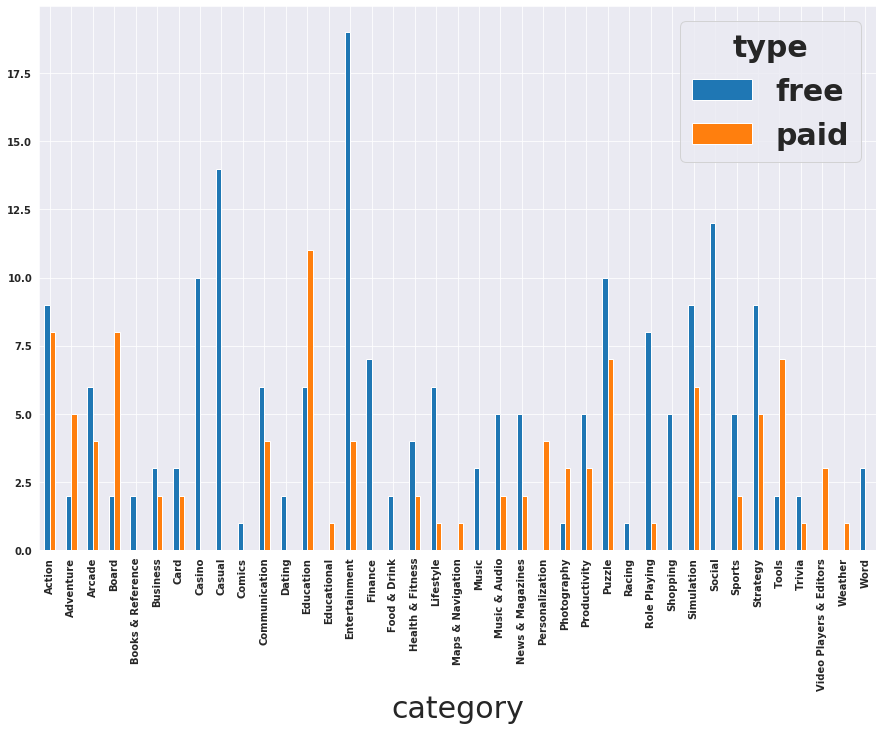

In [54]:
pd.crosstab(dff2["category"], dff2["type"]).plot(kind="bar",figsize=(15, 10));
plt.plot();


#  Q3 : 

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


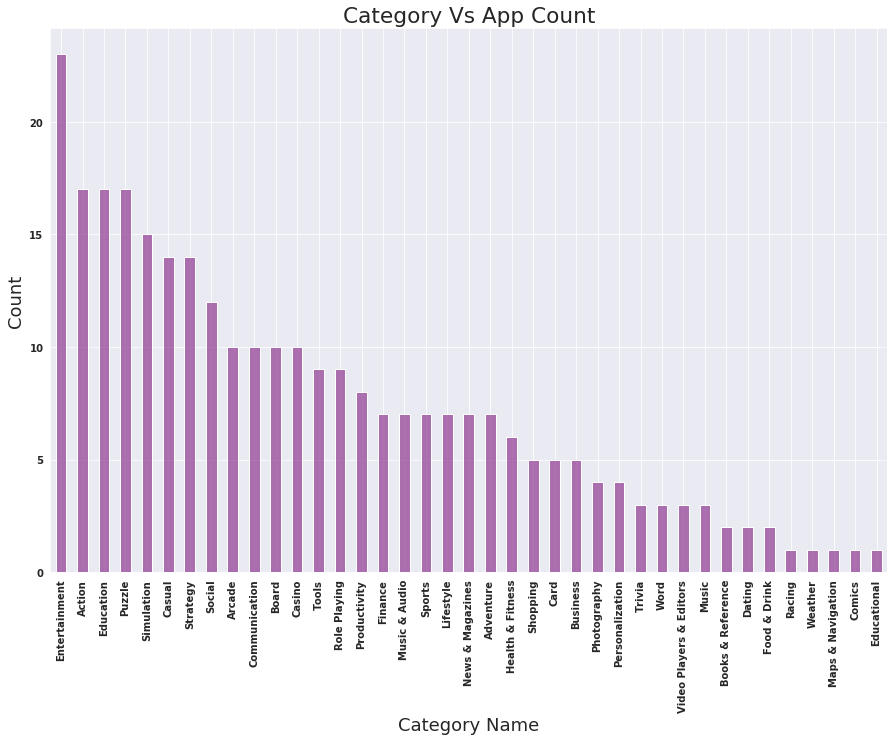

In [55]:
plt.figure(figsize=(15,10))
top.category.value_counts().plot(kind="bar", rot=0, title="Pclass Vs Count", color=(0.5,0.1,0.5,0.6) );
plt.xticks(rotation='vertical');
plt.title("Category Vs App Count")
plt.xlabel("Category Name")
plt.ylabel("Count")
plt.plot();

# Q4 : 

In [29]:
#topC = top.groupby(top['company name'][:30])['# of downloads'].mean().sort_values()

#topC.plot(kind='bar', figsize=(9, 6))
#plt.title("Avreage number of download per company", fontsize=14)
#plt.xlabel('company name', fontsize=12)
#plt.ylabel('Average number of download ', fontsize=12)
#plt.show()

In [30]:
#topC.tail()

In [18]:
df=top.values.tolist()
a=[]
num=0
b= 0 
for i in df:
    num=0;
    x=i[6]
    
    if x in a :
        continue
    for s in df:
        if(s[6]==x):
            num=num+s[4]
            
    a.append([x,num])#unique copany with total downloads


b=[a[0][1],a[0][0]]
m=0
for y in a:
    sss=y[1]
    if(sss>b[0]):
        b=[sss,y[0]]
print(b)
aa=[]
for k in df:
    if(k[6]==b[1]):
        aa.append([k[1],k[4]])
aa#The company that has the most downloads for different apps
        

[6130000000, 'Google LLC']


[['Education', 10000000],
 ['Business', 10000000],
 ['Entertainment', 1000000000],
 ['Music & Audio', 100000000],
 ['Productivity', 10000000],
 ['Productivity', 5000000000]]

In [16]:
top[top['company name']=='Google LLC']

,name,category,# of rates,stars,#ofdownloads,price,company name
4,Google Classroom,Education,129245,3.9,10000000,0.0,Google LLC
5,Hangouts Meet,Business,14906,3.8,10000000,0.0,Google LLC
18,Google Play Games,Entertainment,10361040,4.4,1000000000,0.0,Google LLC
45,YouTube Music - Stream Songs & Music Videos,Music & Audio,988073,4.5,100000000,0.0,Google LLC
100,Google One,Productivity,52524,4.4,10000000,0.0,Google LLC
109,Google Drive,Productivity,5161731,4.4,5000000000,0.0,Google LLC


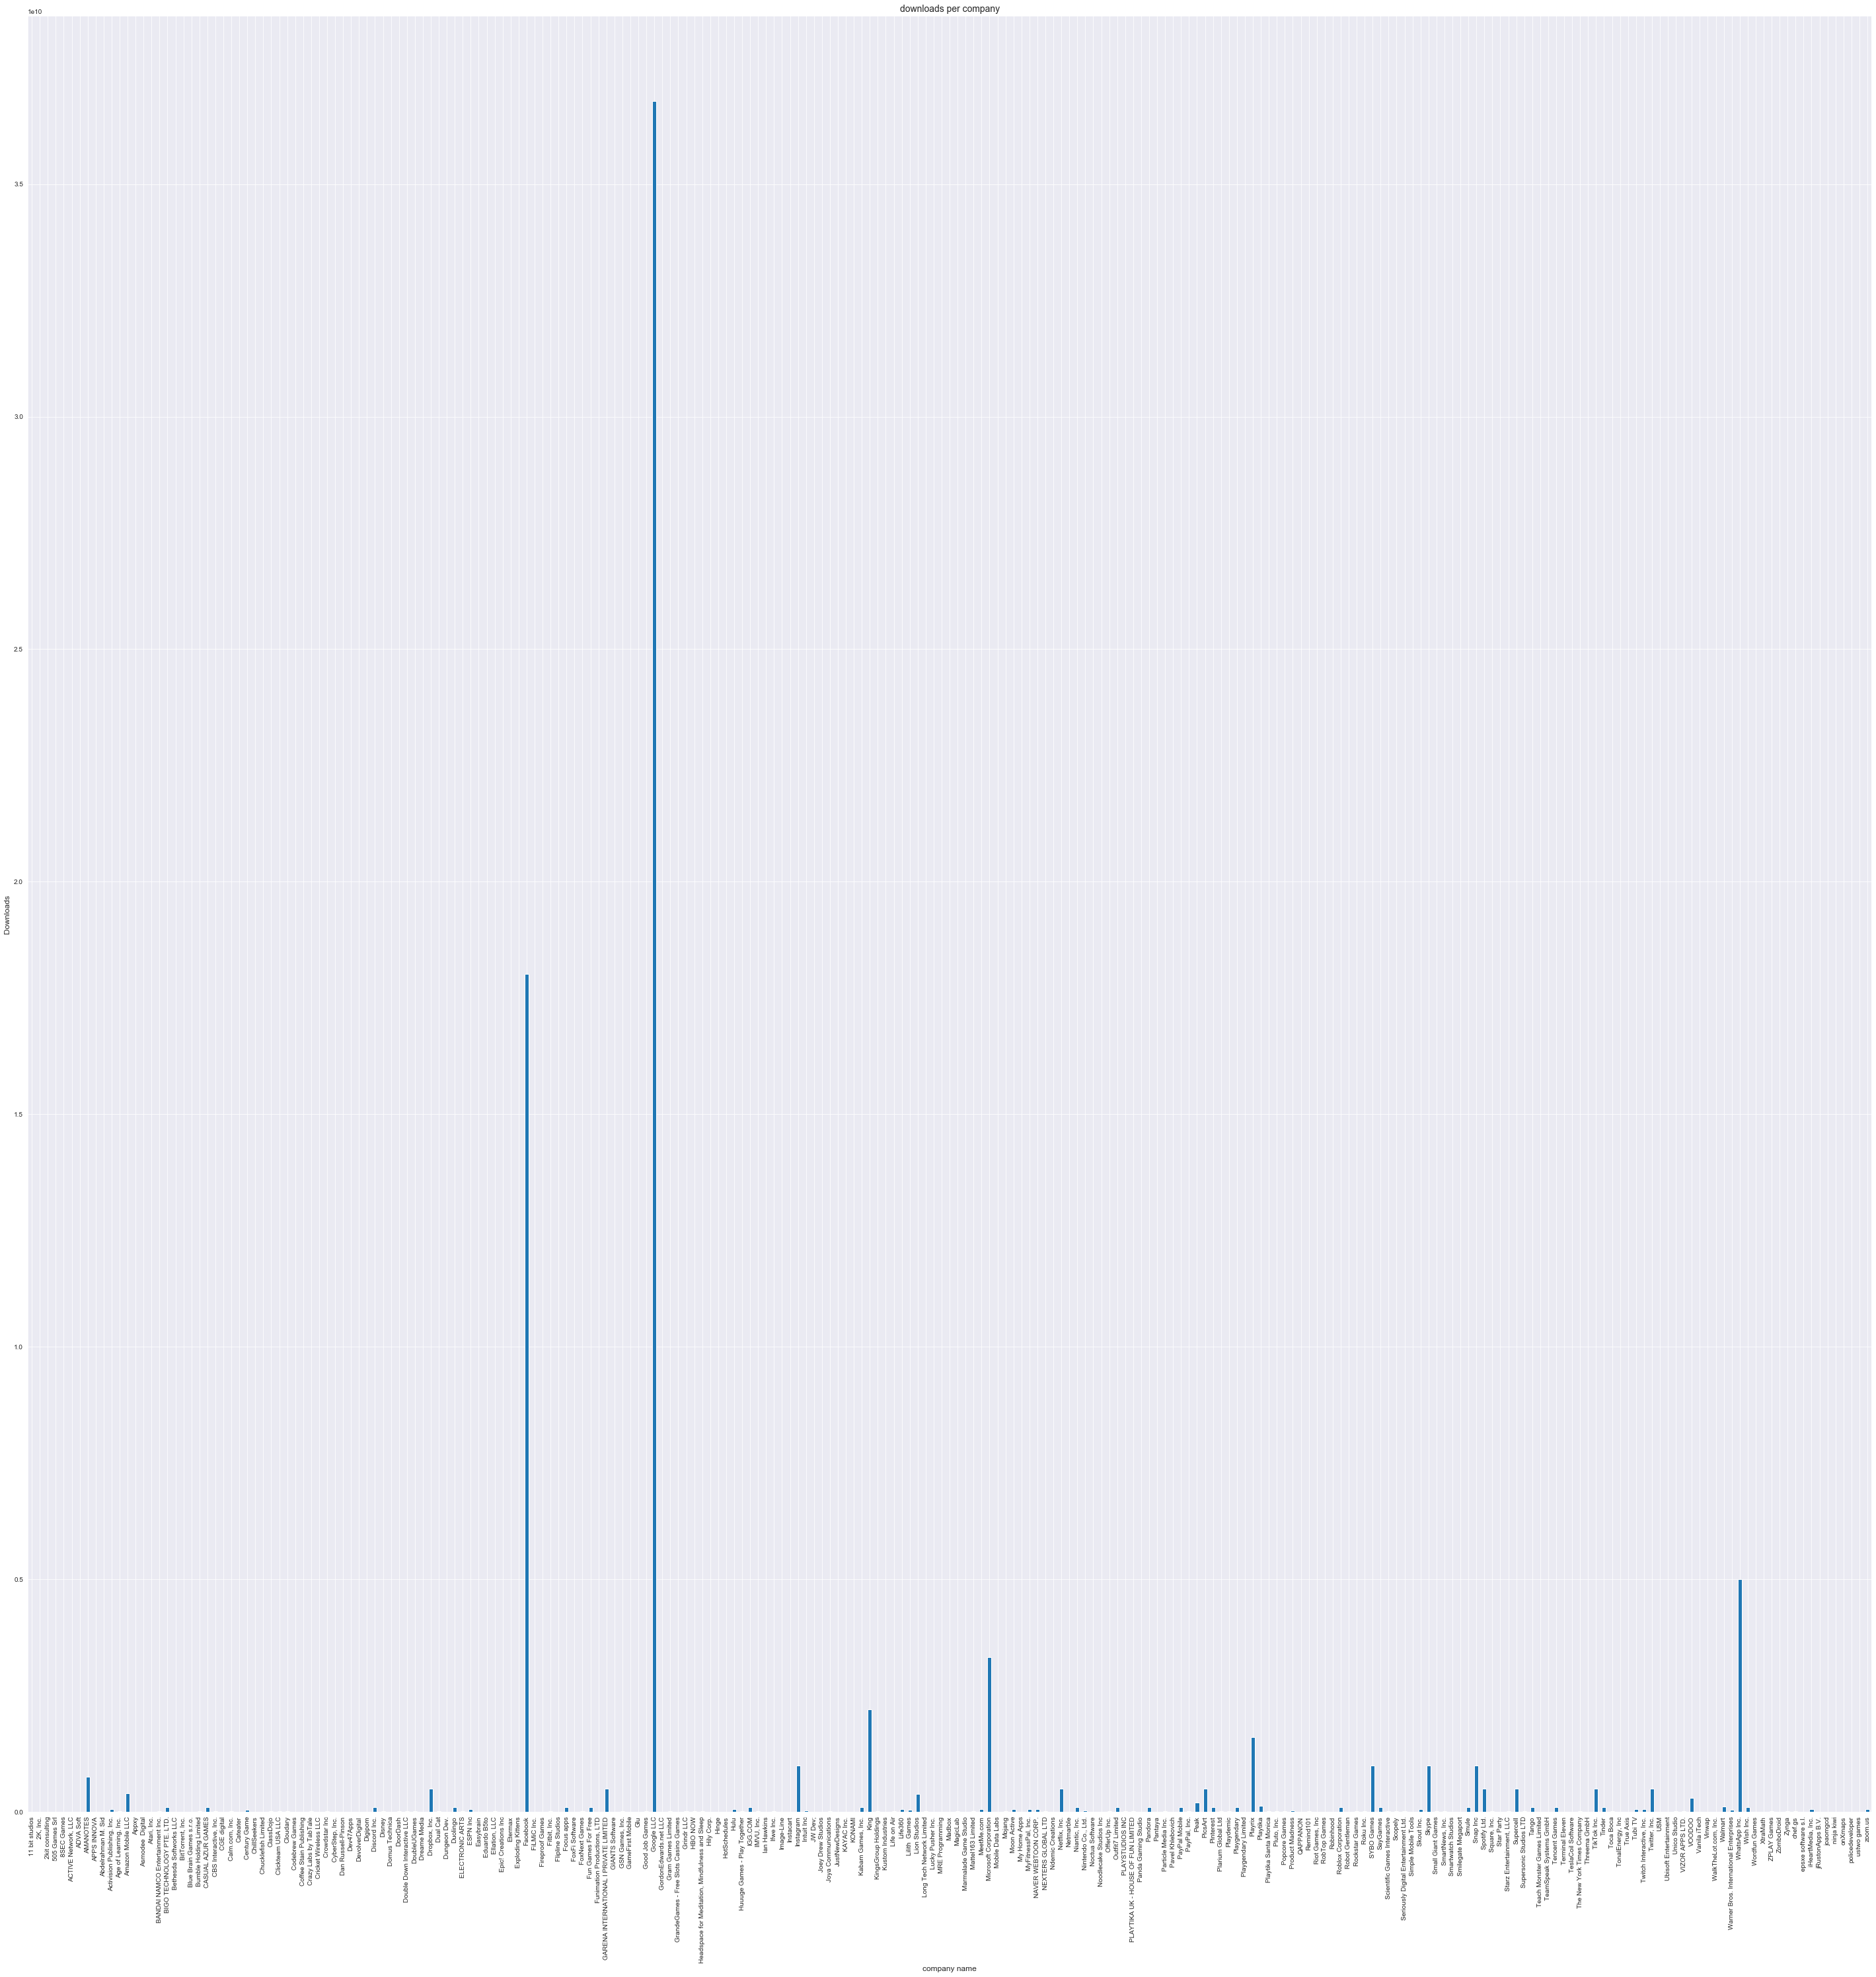

In [22]:
df1 = pd.DataFrame(a , columns =["company name","#ofdownloads"])
topC = df1.groupby(df1['company name'])['#ofdownloads'].sum()

topC.plot(kind='bar', figsize=(50,50))
plt.title("downloads per company", fontsize=14)
plt.xlabel('company name', fontsize=12)
plt.ylabel('Downloads ', fontsize=12)
plt.show()


        category  #ofdownloads
0      Education      10000000
1       Business      10000000
2  Entertainment    1000000000
3  Music & Audio     100000000
4   Productivity      10000000
5   Productivity    5000000000


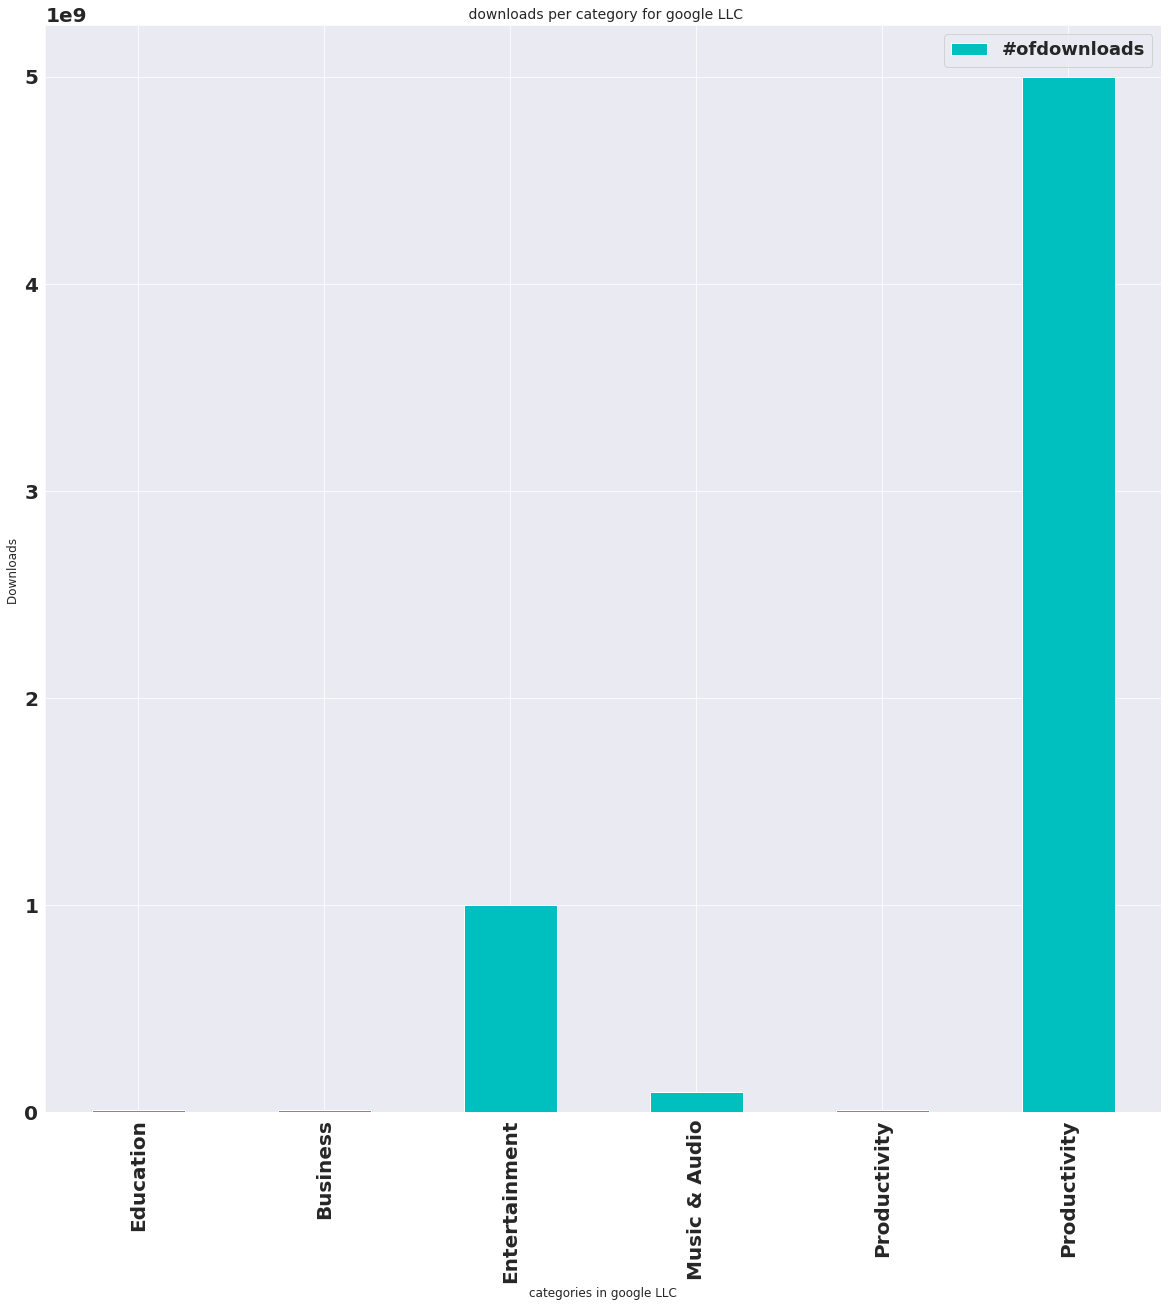

In [80]:
dfh=pd.DataFrame(aa,columns =["category","#ofdownloads"])
print(dfh)
dfh.plot(x='category',y='#ofdownloads',kind='bar', figsize=(20,20),color='c')
plt.title(" downloads per category for google LLC", fontsize=14)
plt.xlabel('categories in google LLC', fontsize=12)
plt.ylabel('Downloads ', fontsize=12)
plt.show()


# Q5 : What is the app company in Top Charts page that got the best rate? in what category ? the most popular category ?

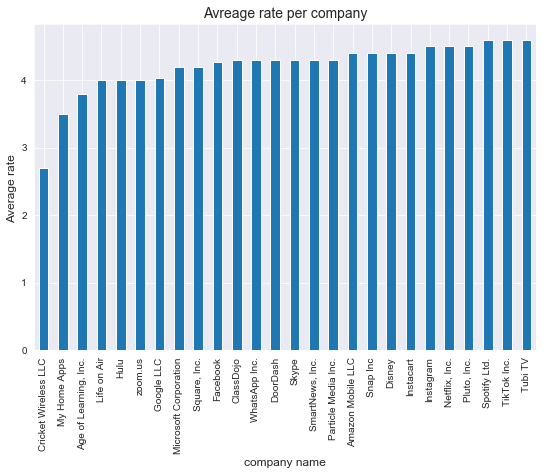

In [32]:
topC = top.groupby(top['company name'][:30])['stars'].mean().sort_values()

topC.plot(kind='bar', figsize=(9, 6))
plt.title("Avreage rate per company", fontsize=14)
plt.xlabel('company name', fontsize=12)
plt.ylabel('Average rate ', fontsize=12)
plt.show()

In [25]:
topC.tail()

company name
Netflix, Inc.    4.5
Pluto, Inc.      4.5
Spotify Ltd.     4.6
TikTok Inc.      4.6
Tubi TV          4.6
Name: stars, dtype: float64

In [34]:
dx = top[top['company name'] .isin(['Tubi TV','TikTok Inc.','Spotify Ltd.','Netflix, Inc.','Pluto, Inc.','Instagram'])]
dx

,name,category,# of rates,stars,#ofdownloads,price,company name
2,TikTok - Make Your Day,Social,17793933,4.6,500000000,0.0,TikTok Inc.
7,Instagram,Social,96388145,4.5,1000000000,0.0,Instagram
9,Netflix,Entertainment,8240431,4.5,500000000,0.0,"Netflix, Inc."
14,Tubi - Free Movies & TV Shows,Entertainment,858154,4.6,50000000,0.0,Tubi TV
23,Pluto TV - It’s Free TV,Entertainment,145817,4.5,10000000,0.0,"Pluto, Inc."
29,"Spotify: Listen to new music, podcasts, and songs",Music & Audio,18142597,4.6,500000000,0.0,Spotify Ltd.


# More Graph

In [ ]:
topC = top.groupby(top['category'])['#ofdownloads'].mean().sort_values()

topC.plot(kind='bar', figsize=(9, 6))
plt.title("Average number of download per category", fontsize=14)
plt.xlabel('category', fontsize=12)
plt.ylabel('Average number of download ', fontsize=12)
plt.show()

In [ ]:
topC = top.groupby(top['category'])['# of rates'].mean().sort_values()

topC.plot(kind='bar', figsize=(9, 6))
plt.title("Average number of rate per category", fontsize=14)
plt.xlabel('category', fontsize=12)
plt.ylabel('Average rate ', fontsize=12)
plt.show()

In [ ]:
topC = top.groupby(top['category'])['stars'].mean().sort_values()

topC.plot(kind='bar', figsize=(9, 6))
plt.title("Avreage stars per category", fontsize=14)
plt.xlabel('category', fontsize=12)
plt.ylabel('Average stars ', fontsize=12)
plt.show()

In [ ]:
topC = top.groupby(top['category'])['price'].mean().sort_values()

topC.plot(kind='bar', figsize=(9, 6))
plt.title("Avreage price per category", fontsize=14)
plt.xlabel('category', fontsize=12)
plt.ylabel('Average price ', fontsize=12)
plt.show()

Text(0, 0.5, 'category')

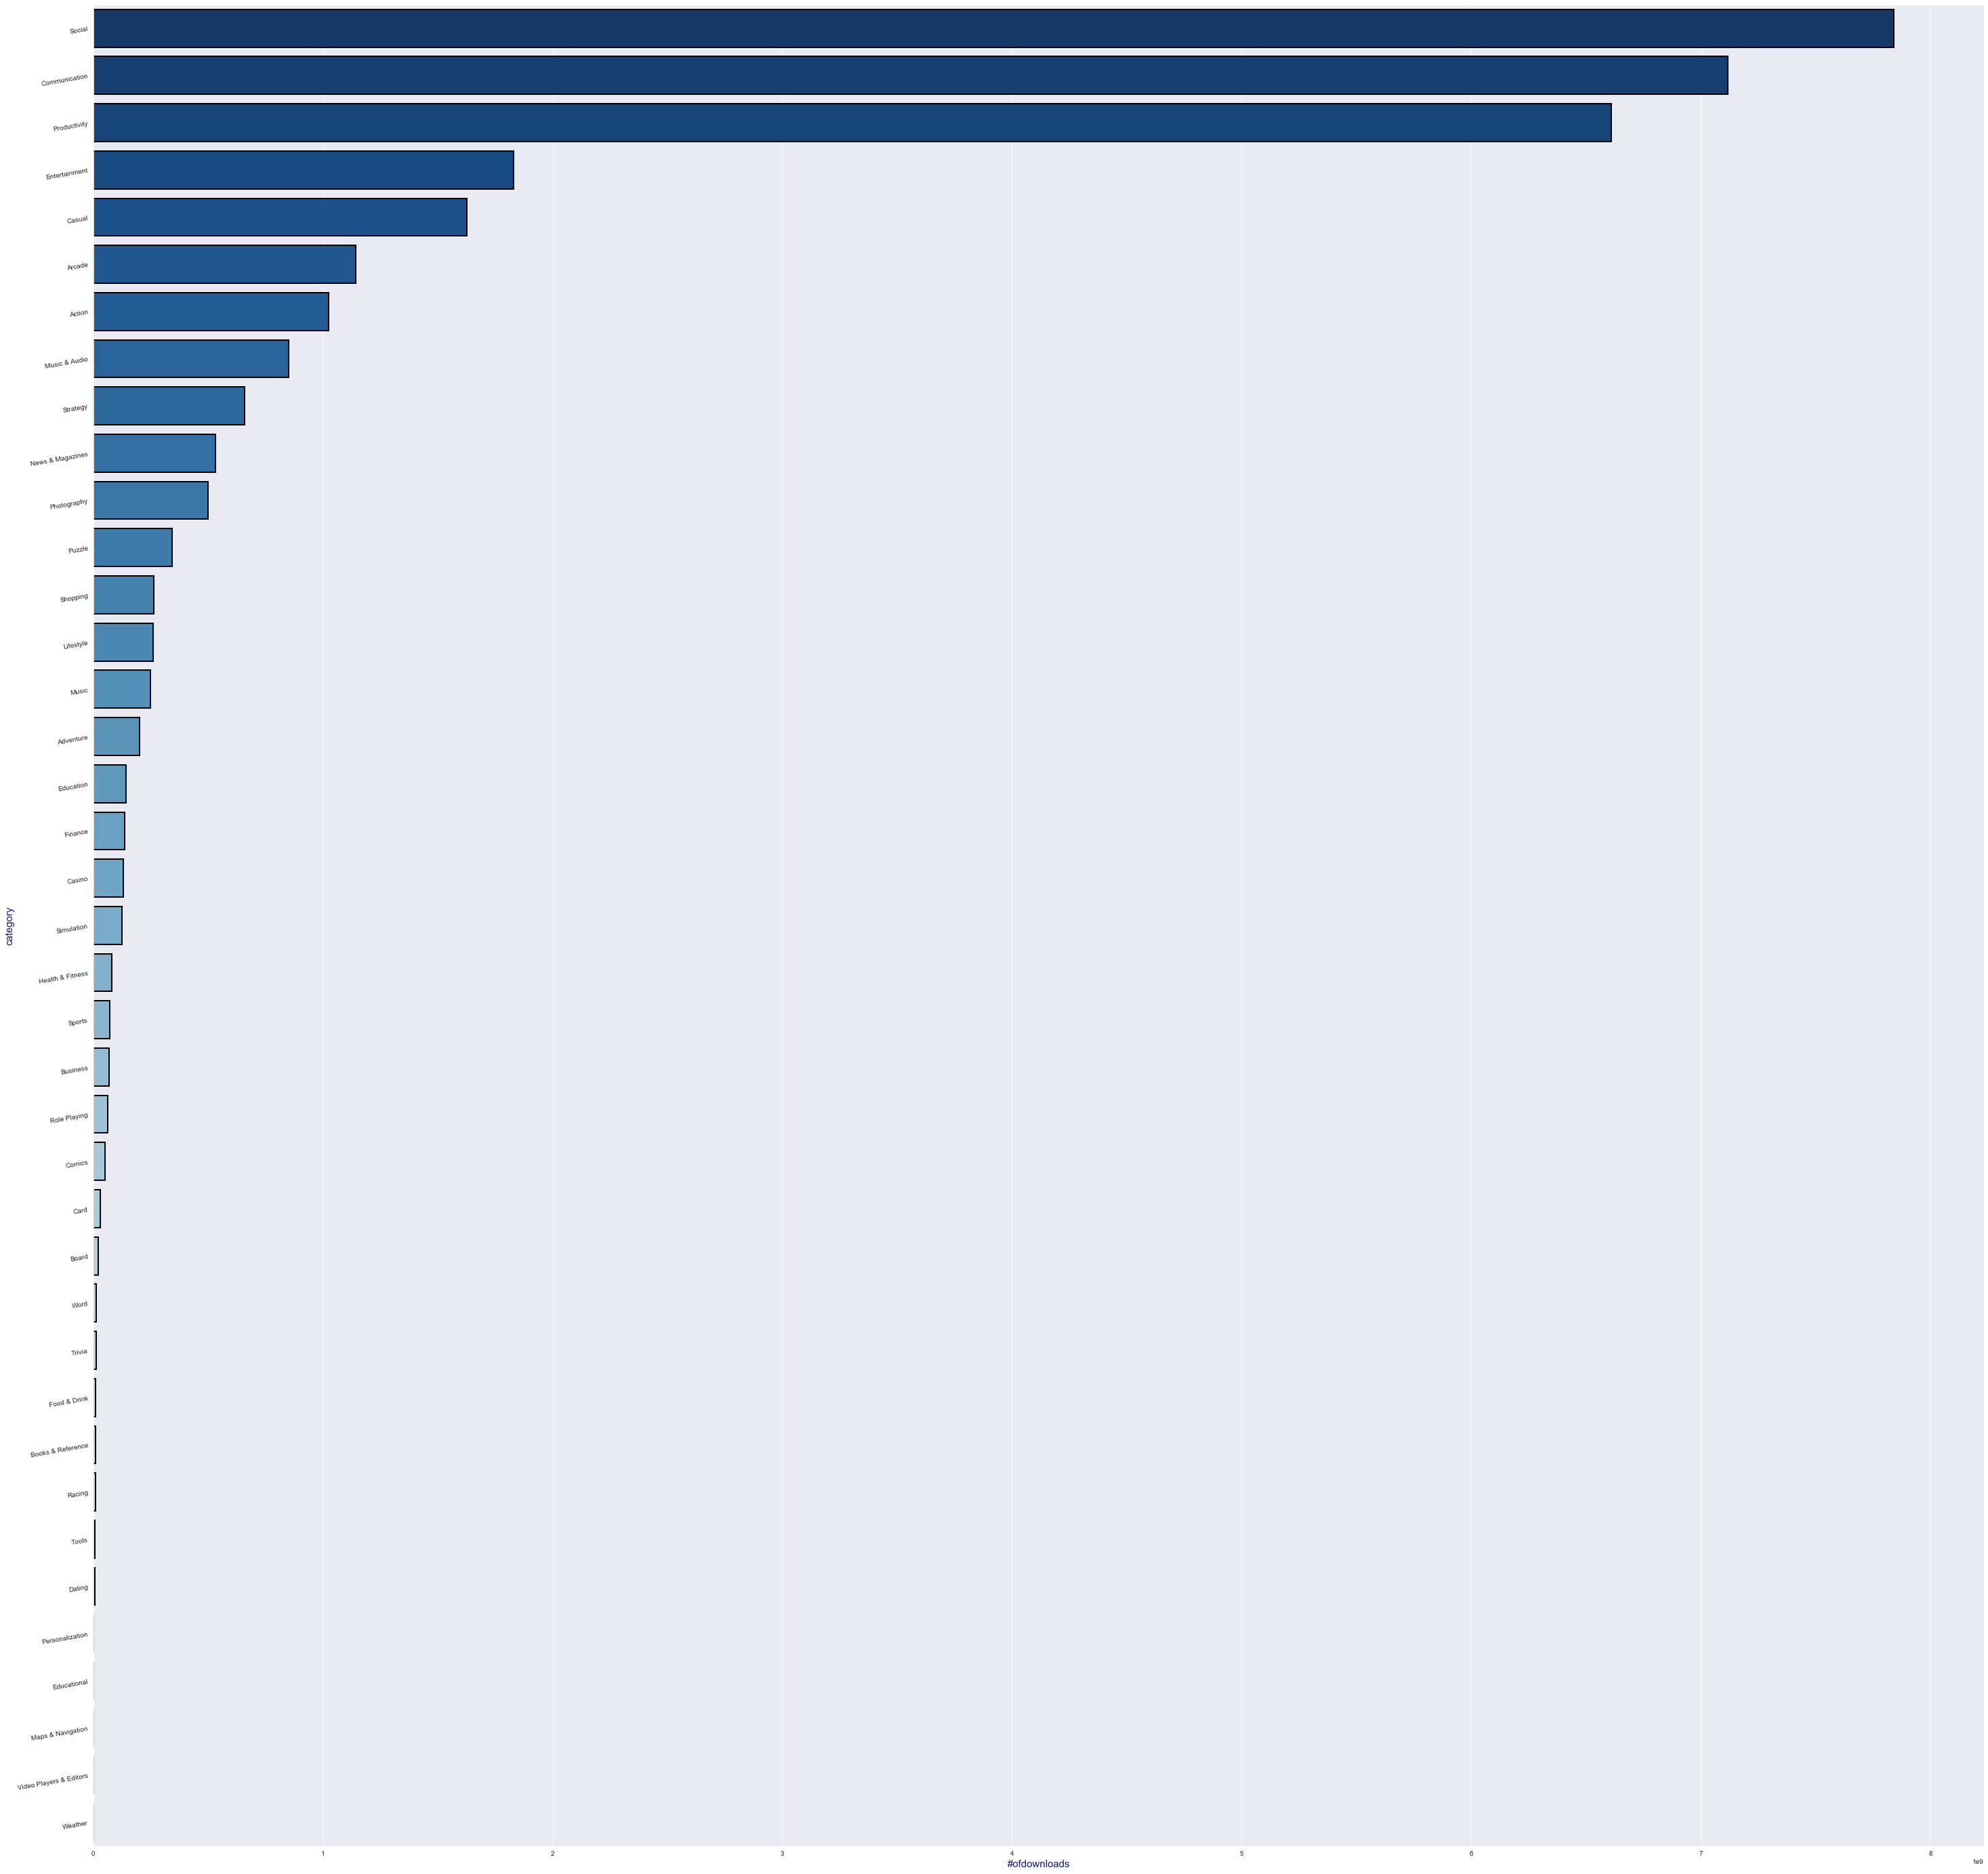

In [43]:
temp_df = top.groupby(['category'])\
                  .agg({'#ofdownloads':'sum'})\
                  .sort_values(by='#ofdownloads',ascending=False).reset_index()

plt.figure(figsize=(50,50))
sns.set_style("darkgrid")

sns.barplot(x=temp_df['#ofdownloads'], 
            y=temp_df['category'], 
            linewidth=2, 
            edgecolor="k"*len(temp_df), 
            palette="Blues_r" )
plt.yticks(rotation=10)

plt.xlabel('#ofdownloads', fontsize=15, color='#191970')
plt.ylabel('category', fontsize=15, color='#191970')

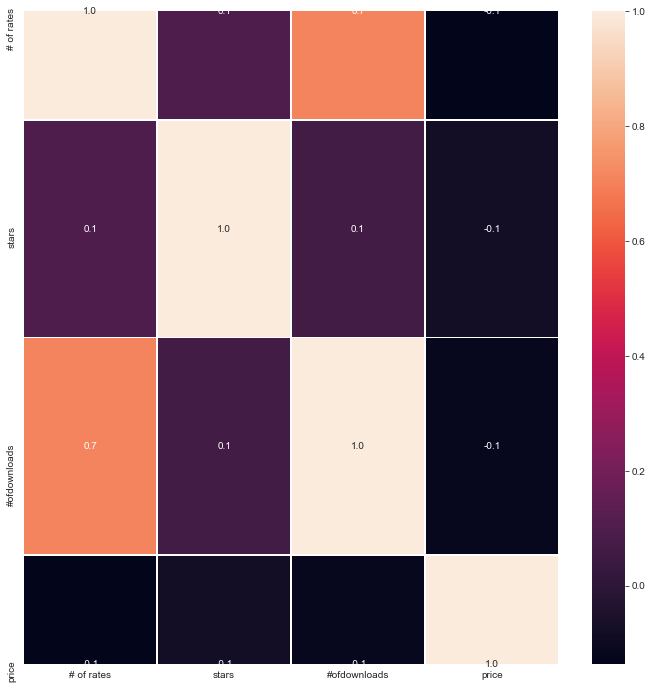

In [46]:
#Visualizing correlation 
#correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(top.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

# Calculations:

In [44]:
a=top.sort_values(by='stars', ascending=False).head(10)
b=top.sort_values(by='#ofdownloads', ascending=False).head(10)


from IPython.display import display
print("Top 10 apps ")
display(a)
display(b)

Top 10 apps 


,name,category,# of rates,stars,#ofdownloads,price,company name
60,"Q Alerts! QAnon Q Drops, Alerts, Research, Sha...",News & Magazines,1142,4.9,10000,2.99,"WalkTheLot.com, Inc."
56,Tiny Scanner Pro: PDF Doc Scan,Business,16686,4.9,100000,4.99,Appxy
212,Through the Ages,Board,9106,4.8,50000,9.99,CGE digital
191,Word Swipe Pic,Word,22773,4.8,1000000,0.00,Wordfun Games
85,WiFi Analyzer Premium,Tools,2361,4.8,10000,3.99,Abdelrahman M. Sid
78,Stack the States®,Education,2023,4.8,100000,2.99,Dan Russell-Pinson
69,Meme Generator PRO,Entertainment,5349,4.8,100000,2.99,ZomboDroid
65,"QMAP: Qanon Drops, Alerts, WWG1WGA Wall and Me...",News & Magazines,312,4.8,10000,2.99,QAPPANON
240,Monument Valley,Puzzle,220229,4.8,1000000,3.99,ustwo games
82,Easy Voice Recorder Pro,Productivity,21119,4.8,100000,3.99,Digipom


,name,category,# of rates,stars,#ofdownloads,price,company name
16,Facebook,Social,96841011,4.2,5000000000,0.0,Facebook
10,WhatsApp Messenger,Communication,107769728,4.3,5000000000,0.0,WhatsApp Inc.
109,Google Drive,Productivity,5161731,4.4,5000000000,0.0,Google LLC
26,Snapchat,Social,21581678,4.4,1000000000,0.0,Snap Inc
138,Microsoft OneDrive,Productivity,1582813,4.6,1000000000,0.0,Microsoft Corporation
18,Google Play Games,Entertainment,10361040,4.4,1000000000,0.0,Google LLC
189,Subway Surfers,Arcade,32288349,4.5,1000000000,0.0,SYBO Games
11,Messenger – Text and Video Chat for Free,Communication,71415952,4.2,1000000000,0.0,Facebook
25,Skype - free IM & video calls,Communication,10988483,4.3,1000000000,0.0,Skype
193,Candy Crush Saga,Casual,27899963,4.6,1000000000,0.0,King


In [47]:
top.corr()

,# of rates,stars,#ofdownloads,price
# of rates,1.000000,0.096224,0.708592,-0.136093
stars,0.096224,1.000000,0.064484,-0.082706
#ofdownloads,0.708592,0.064484,1.000000,-0.113919
price,-0.136093,-0.082706,-0.113919,1.000000


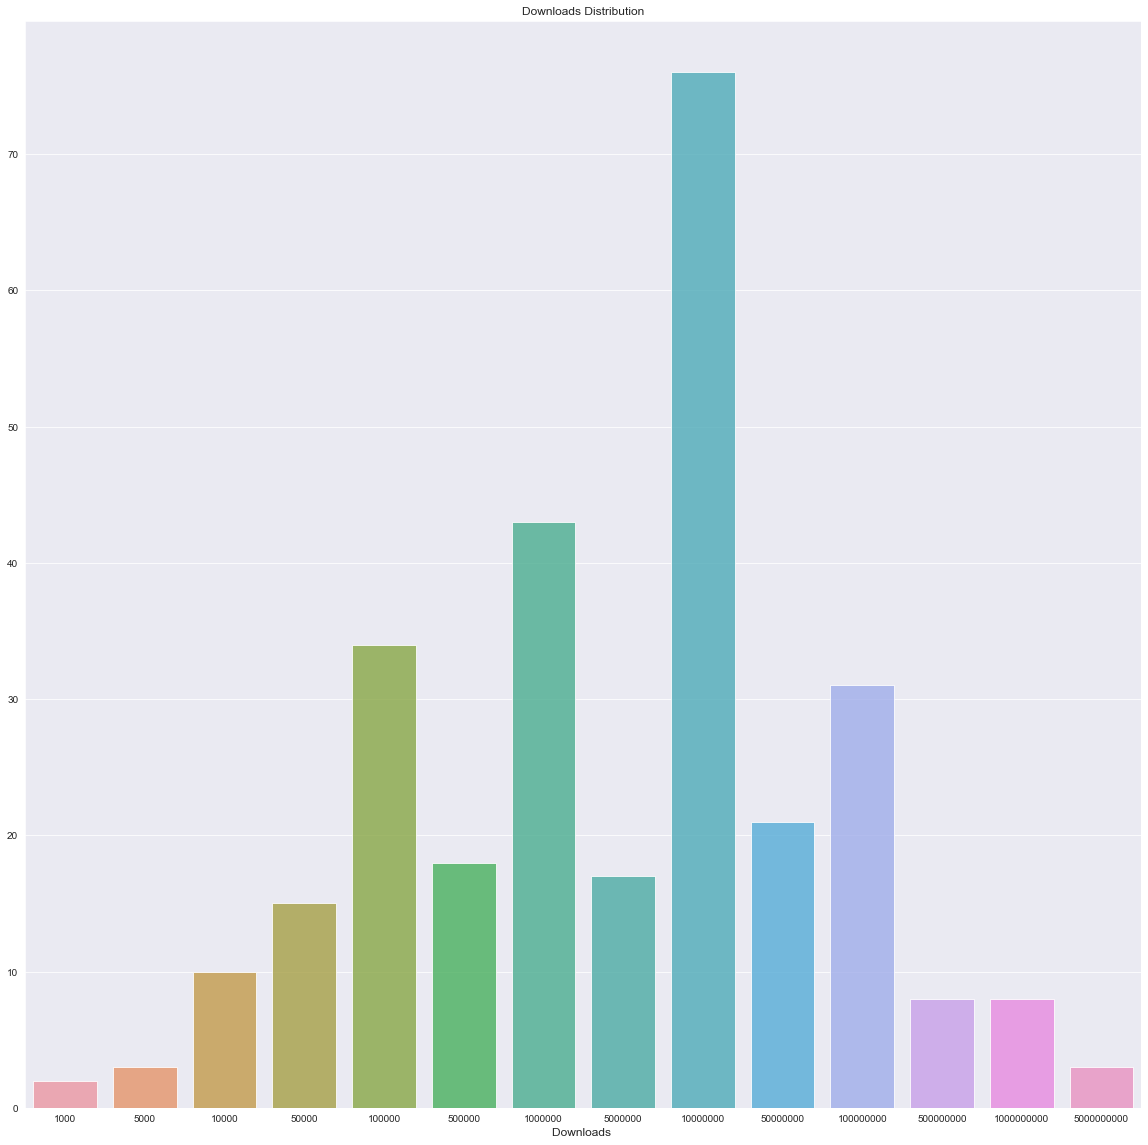

In [9]:
x = top['#ofdownloads'].value_counts().index
y = top['#ofdownloads'].value_counts().values

plt.figure(figsize=(20,20))
ax= sns.barplot(x, y,data= top ,alpha=0.8 )
plt.title("Downloads Distribution")
plt.xlabel('Downloads ', fontsize=12);

In [14]:
top[top['#ofdownloads'] >=1000000]

,name,category,# of rates,stars,#ofdownloads,price,company name
0,ZOOM Cloud Meetings,Business,92396,4.0,50000000,0.0,zoom.us
1,News Break: Local & Breaking,News & Magazines,121589,4.3,10000000,0.0,Particle Media Inc.
2,TikTok - Make Your Day,Social,17793933,4.6,500000000,0.0,TikTok Inc.
3,SmartNews: Local Breaking News,News & Magazines,382050,4.3,10000000,0.0,"SmartNews, Inc."
4,Google Classroom,Education,129245,3.9,10000000,0.0,Google LLC
...,...,...,...,...,...,...,...
284,Solitaire TriPeaks: Play Free Solitaire Card G...,Card,562372,4.5,10000000,0.0,"GSN Games, Inc."
285,Slots: Heart of Vegas™ – Free Slot Casino Games,Casino,348848,4.4,10000000,0.0,Product Madness
286,AFK Arena,Role Playing,2066908,4.6,10000000,0.0,Lilith Games
287,Epic Seven,Role Playing,226792,4.2,1000000,0.0,Smilegate Megaport
